In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as mth
import time
from decimal import Decimal
import datetime
import jdcal as j

In [2]:
Star = "Capella"
star_df = pd.read_csv("Capella_data.csv",sep = ',')
star_df.columns

Index(['Hora', 'Azimut', 'Elevación', 'Velocidad Azimut',
       'Velocidad Elevación', 'Delta Tiempo', 'tiempo_jd'],
      dtype='object')

In [3]:
Hora = np.array(star_df["Hora"])
azimut = np.array(star_df["Azimut"])
elev = np.array(star_df["Elevación"])
vel_az = np.array(star_df["Velocidad Azimut"])
vel_el = np.array(star_df["Velocidad Elevación"])
tiempo_jd = np.array(star_df["tiempo_jd"])
Hora_data = Hora

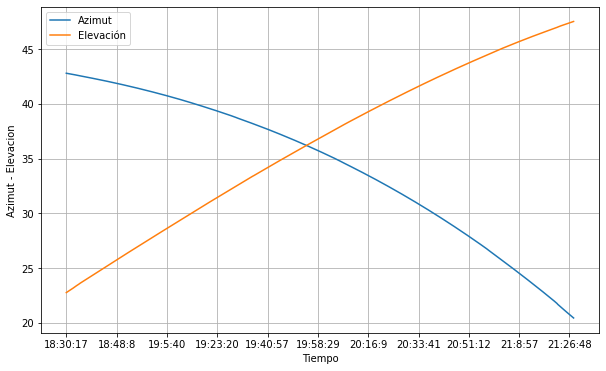

In [4]:
#Grafica de posicion

xpos_stick = len(Hora)
fig, ax = plt.subplots(figsize=(10,6))
azimut_plot = ax.plot(Hora, azimut ,label="Azimut")
elevacion_plot = ax.plot(Hora, elev,label="Elevación")
ax.set_ylabel("Azimut - Elevacion")
ax.set_xlabel("Tiempo")
xpos_values = ax.get_xticks()
newx_pos_values = [xpos_values[i] for i in range(0,xpos_stick,xpos_stick//10)]
ax.set_xticks(newx_pos_values)
ax.legend()
ax.grid(b=True)

plt.savefig(Star + "_pos"+".jpg")

In [5]:
#Calculo de las velocidades en el azimut
N_msteps = 8.0
z = 5
Az_num = len(azimut)/z
Az_num = mth.floor(Az_num)

Az_control = []
Az_tiempo = [] 
Az_delta_T = []
Az_delta_az = []
Az_w = []
Az_f = []
Az_T = []
Num_stepps = []
Num_stepps2 = []
Az_hora_control = []

for i in range(z+1):
    Az_control.append(azimut[i*Az_num])
    Az_tiempo.append(tiempo_jd[i*Az_num])
    Az_hora_control.append(Hora_data[i*Az_num])

for i in range(len(Az_control)-1):
    Az_delta_T.append((Az_tiempo[i+1]-Az_tiempo[i])*86400)
    Az_w.append(300*(Az_control[i+1]-Az_control[i])/(Az_delta_T[i]))
    Az_delta_az.append(300*(Az_control[i+1]-Az_control[i])) 


for i in range(len(Az_w)):
    Az_f.append(round((N_msteps/1.8)*Az_w[i],2))
    Az_T.append(1/Az_f[i])
    Num_stepps.append(Az_delta_T[i]/Az_T[i])
    Num_stepps2.append(Az_delta_az[i]/(1.8/N_msteps))

for i in range(len(Num_stepps)):
    if i % 2 != 0: 
        Num_stepps[i] = mth.floor(Num_stepps[i])
    else: 
        Num_stepps[i] = mth.ceil(Num_stepps[i])
Az_tiempos = []
for i in range(len(Num_stepps)):
    Az_tiempos.append(Num_stepps[i] / Az_f[i])

Az_controlled = np.empty(len(Az_control))
Az_controlled[0] = Az_control[0]
for i in range(1,len(Az_control)):
    Az_controlled[i] = Az_controlled[i-1] + (Num_stepps[i-1]*(1.8/N_msteps)/300)
np.array(Az_control) - np.array(Az_controlled)


error_az = np.array(Az_control) - np.array(Az_controlled)
Num_Stepps_az = Num_stepps
error_az

array([ 0.        , -0.00718472, -0.00955731, -0.01086813, -0.01619557,
       -0.02393134])

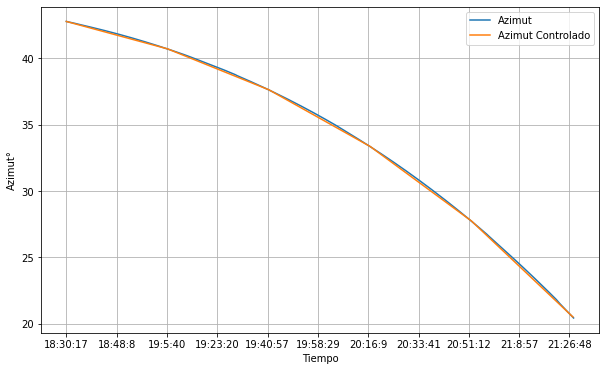

In [6]:
xpos_stick = len(Hora)
fig, ax = plt.subplots(figsize=(10,6))
azimut_plot = ax.plot(Hora, azimut,label="Azimut")
azimut_controlado = ax.plot(Az_hora_control,Az_controlled, label = 'Azimut Controlado')

ax.set_ylabel("Azimut°")
ax.set_xlabel("Tiempo")
xpos_values = ax.get_xticks()
newx_pos_values = [xpos_values[i] for i in range(0,xpos_stick,xpos_stick//10)]
ax.set_xticks(newx_pos_values)
ax.legend()
ax.grid(b=True)
# plt.savefig(Star + "_pos_az_con"+".jpg")

In [7]:
#Calculo de las velocidades en elevación
z_el = 4
El_num = len(elev)/z_el
El_num = mth.floor(El_num)

El_control = []
El_tiempo = [] 
El_delta_T = []
El_delta_el = []
El_w = []
El_f = []
El_T = []
Num_stepps = []
Num_stepps2 = []
El_hora_control = []

for i in range(z_el +1):
    El_control.append(elev[i*El_num])
    El_tiempo.append(tiempo_jd[i*El_num])
    El_hora_control.append(Hora_data[i*El_num])

for i in range(len(El_control)-1):
    El_delta_T.append((El_tiempo[i+1]-El_tiempo[i])*86400)
    El_w.append(200*(El_control[i+1]-El_control[i])/(El_delta_T[i]))
    El_delta_el.append(200*(El_control[i+1]-El_control[i])) 

for i in range(len(El_w)):
    El_f.append(round((N_msteps/1.8)*El_w[i],2))
    El_T.append(1/El_f[i])
    Num_stepps.append(El_delta_T[i]/El_T[i])
    Num_stepps2.append(El_delta_el[i]/(1.8/N_msteps))



for i in range(len(Num_stepps)):
    if i % 2 != 0: 
        Num_stepps[i] = mth.floor(Num_stepps[i])
    else: 
        Num_stepps[i] = mth.ceil(Num_stepps[i])
El_tiempos = []
for i in range(len(Num_stepps)):
    El_tiempos.append(Num_stepps[i] / El_f[i])
    

El_controlled = np.empty(len(El_control))
El_controlled[0] = El_control[0]
for i in range(1,len(El_control)):
    El_controlled[i] = El_controlled[i-1] + (Num_stepps[i-1]*(1.8/N_msteps)/200)
np.array(El_control) - np.array(El_controlled)

Num_stepps_el = Num_stepps
error_el = np.array(El_control) - np.array(El_controlled)
error_el

array([22.75866127, 22.79914093, 22.83960533, 22.88006401, 22.92065048,
       22.96082306, 23.00139236, 23.04181671, 23.08210182, 23.12251282,
       23.17193413, 23.21905708, 23.26172447, 23.3019619 , 23.35147476,
       23.39626694, 23.43647575, 23.47909546, 23.51942253, 23.57102585,
       23.61133385, 23.6516304 , 23.69191933, 23.7320652 , 23.77918053,
       23.81944084, 23.85969162, 23.89993477, 23.9403019 , 23.9848156 ,
       24.02516556, 24.06537056, 24.10543251, 24.14575195, 24.18593025,
       24.22596359, 24.26625824, 24.30627441, 24.34654999, 24.38654709,
       24.42680168, 24.4667778 , 24.50701714, 24.54697609, 24.58732796,
       24.62726784, 24.66746521, 24.70738602, 24.74743271, 24.78746605,
       24.82749176, 24.86750793, 24.90751457, 24.94737625, 24.98749542,
       25.02747154, 25.06743813, 25.10739326, 25.14733887, 25.18727493,
       25.22720146, 25.26711655, 25.30702209, 25.3469162 , 25.38680267,
       25.4266777 , 25.46654129, 25.50639534, 25.54623985, 25.58

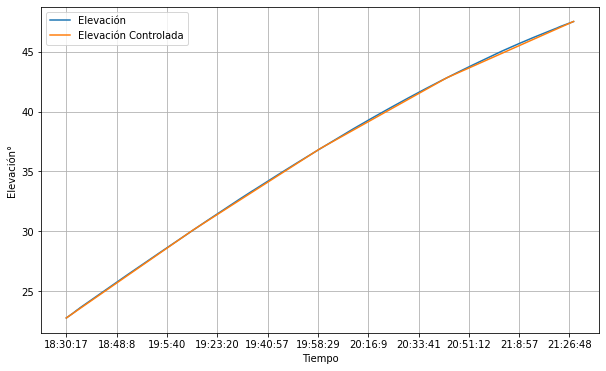

In [12]:
xpos_stick = len(Hora)
fig, ax = plt.subplots(figsize=(10,6))
elevacion_plot = ax.plot(Hora, elev,label="Elevación")
elevacion_controlado = ax.plot(El_hora_control,El_controlled, label = 'Elevación Controlada')

ax.set_ylabel("Elevación°")
ax.set_xlabel("Tiempo")
xpos_values = ax.get_xticks()
newx_pos_values = [xpos_values[i] for i in range(0,xpos_stick,xpos_stick//10)]
ax.set_xticks(newx_pos_values)
ax.legend()
ax.grid(b=True)
plt.savefig(Star + "_pos_el_con"+".jpg")

In [11]:
print("----------------------VELOCIDADES PARAMETRIZADAS-----------------------------","\n"
    "Frecuencias del eje de elevación: ",El_f,"\n",
    "Pasos por frecuencia: ",Num_stepps_el,"\n",
      "Tiempos de cada frencuencia:", Az_tiempos,"\n"
      "Errores acumulados: ", error_el,"\n",
      "-----------","\n",
    "Frecuencias del eje de azimut: ",Az_f,"\n",
    "Pasos por frecuencia: ",Num_Stepps_az,"\n",
      "Tiempos de cada frencuencia:", El_tiempos,"\n",
      "Errores acumulados: ", error_az,"\n"
      
      
)

----------------------VELOCIDADES PARAMETRIZADAS----------------------------- 
Frecuencias del eje de elevación:  [2.44, 2.27, 1.98, 1.56] 
 Pasos por frecuencia:  [6532, 6034, 5264, 4185] 
 Tiempos de cada frencuencia: [2137.209302325581, 2131.6062176165806, 2126.492537313433, 2116.9491525423728, 2150.4464285714284] 
Errores acumulados:  [ 0.         -0.00040315 -0.01220204  0.00073067 -0.00648186] 
 ----------- 
 Frecuencias del eje de azimut:  [-1.29, -1.93, -2.68, -3.54, -4.48] 
 Pasos por frecuencia:  [-2757, -4114, -5699, -7494, -9634] 
 Tiempos de cada frencuencia: [2677.0491803278687, 2658.149779735683, 2658.5858585858587, 2682.6923076923076] 
 Errores acumulados:  [ 0.         -0.00718472 -0.00955731 -0.01086813 -0.01619557 -0.02393134] 

